# PRS Analysis

## 6.1. Computing a PRS

Single variant association analysis has been the primary method in GWAS but requires very large sample sizes to detect more than a handful of SNPs for many complex traits. In contrast, PRS analysis does not aim to identify individual SNPs but instead aggregates genetic risk across the genome in a single individual polygenic score for a trait of interest. 

In this approach, a large discovery sample is required to reliably determine how much each SNP is expected to contribute to the polygenic score (“weights”) of a specific trait. Subsequently, in an independent target sample, which can be more modest in size ([Dudbridge, 2013](https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1003348)), polygenic scores can be calculated based on genetic DNA profiles and these weights (see below for details on the calculations). As a rule of thumb, a target sample around **2,000 subjects** provides sufficient power to detect a significant proportion of variance explained. Furthermore, the discovery and target samples should have the same number of subjects until the target sample includes 2,000 subjects. If more samples are available, additional subjects should be included in the discovery sample to maximize the accuracy of the estimation of the effect sizes (Dudbridge, 2013).

Although PRS is not powerful enough to predict disease risk on the individual level ([Wray et al., 2013](https://www.nature.com/articles/nrg3457)), it has been successfully used to show significant associations both within and across traits. For example, a PRS analysis of schizophrenia showed for the first time that an aggregate measure of the genetic risk to develop schizophrenia, estimated based on the effects of common SNPs (from the discovery sample) that showed nominally significant associations with disease risk, was significantly associated with schizophrenia risk in an independent (target) sample. The significant association was found despite the fact that the available sample sizes were too small to detect genome‐wide significant SNPs (Purcell et al., 2009). In addition, GWAS for schizophrenia (the discovery sample) has been used to significantly predict the risk in target samples with various phenotypes, such as bipolar disorder, level of creativity, and even risk of immune disorders ([Power et al., 2015](https://www.nature.com/articles/nn.4040); [Stringer et al., 2014](https://www.sciencedirect.com/science/article/pii/S0920996414004630); Wray et al., 2013).

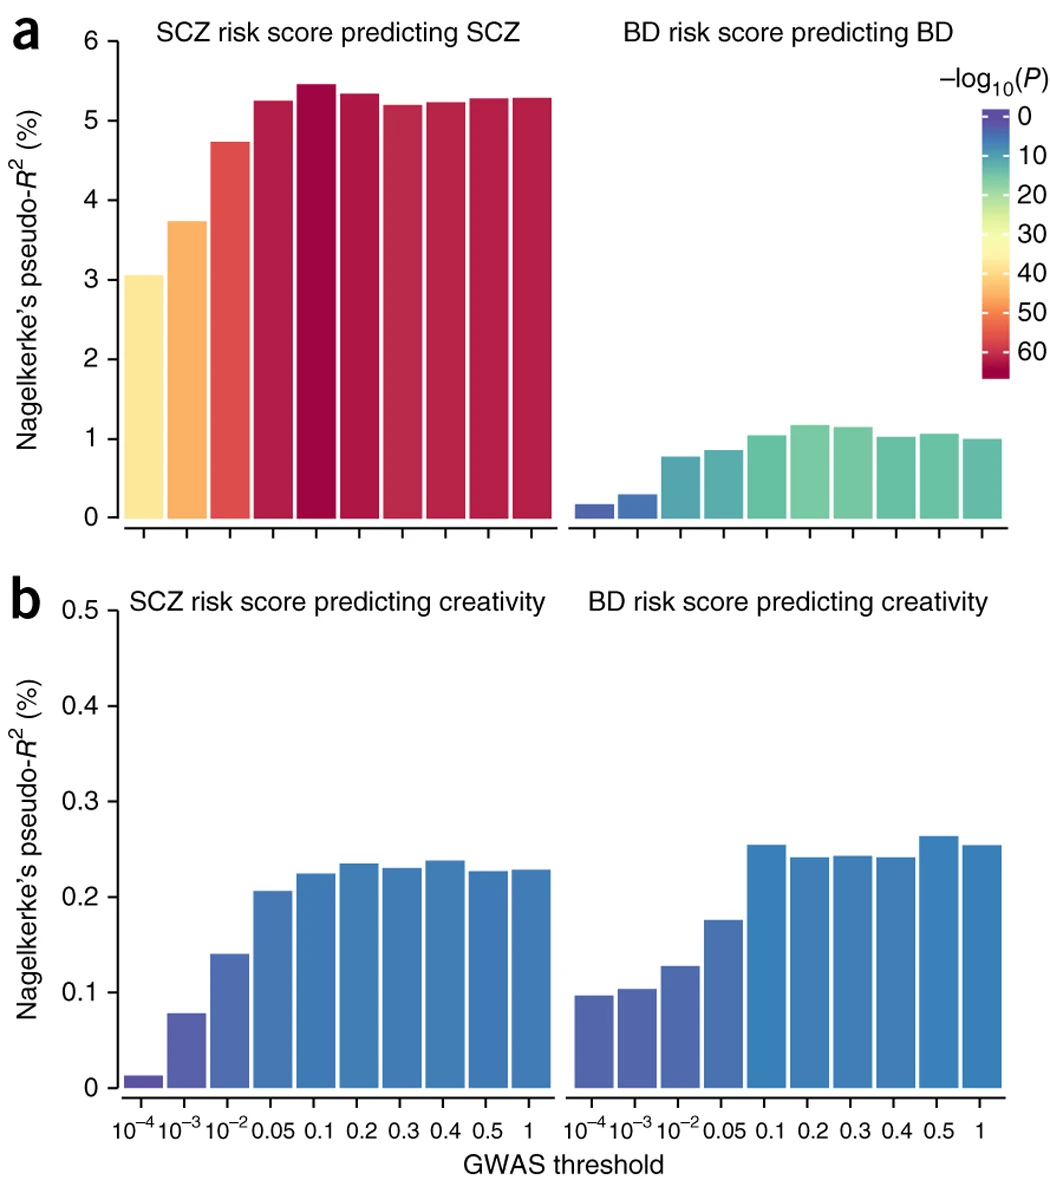

*Figure 6.1: Prediction of schizophrenia (SCZ) and bipolar disorder (BD) in Iceland using polygenic risk scores derived from independent GWASs of these disorders ([Power et al., 2015](https://www.nature.com/articles/nn.4040))*

## 6.2. Conducting polygenic risk prediction analyses

To conduct PRS analysis, trait‐specific weights (beta's for continuous traits and the log of the odds ratios for binary traits) are obtained from a discovery GWAS. In the target sample, a PRS is calculated for each individual based on the weighted sum of the number of risk alleles that he or she carries multiplied by the trait‐specific weights. For many complex traits, SNP effect sizes are publicly available (e.g., see https://www.med.unc.edu/pgc/downloads).

Although in principle all common SNPs could be used in a PRS analysis, it is customary to first clump the GWAS results before computing risk scores. P-value thresholds are typically used to remove SNPs that show little or no statistical evidence for association (e.g., only keep SNPs with p-values <0.5 or <0.1). Usually, multiple PRS analyses will be performed, with varying thresholds for the p-values.

Once PRS have been calculated for all subjects in the target sample, the scores can be used in a (logistic) regression analysis to predict any trait that is expected to show genetic overlap with the trait of interest. The prediction accuracy can be expressed with the (pseudo‐)$R^2$ measure of the regression analysis. It is important to include at least a few MDS components as covariates in the regression analysis to control for population stratification. To estimate how much variation is explained by the PRS, the $R^2$ of a model that includes only the covariates (e.g., MDS components) and the $R^2$ of a model that includes covariates + PRS will be compared. The increase in $R^2$ due to the PRS indicates the increase in prediction accuracy explained by genetic risk factors.

The prediction accuracy of PRS depends mostly on the (co‐)heritability of the analysed traits, the number of SNPs, and the size of the discovery sample. The size of the target sample only affects the reliability of $R^2$ and typically a few thousand of subjects in the target sample are sufficient to achieve a significant $R^2$ if the (co‐)heritability of the trait(s) of interest and the sample size of the discovery sample used are sufficiently large.

## 6.3. Polygenic risk score analysis with PRSice-2
To perform polygenic risk score analysis we suggest to use PRSice (https://choishingwan.github.io/PRSice/). In this tutorial we provide a step-by-step guide to perform a simple polygenic risk score analysis using PRSice and explain how to interpret the results.

We have supplied PRSice-2 on the server ready for use.

The installated package will include an R script that is straigtforward to run. It requires the following information:

- `--prsice`: the binary executable file
- `--base`: the `.assoc` file that contains statistical information
- `--target`: the PLINK-formatted dataset

**NOTE:** It would be ideal at this point to apply this method of analysis to our HapMap dataset. However, as mentioned above, PRS requires a sample size of around 2000 for it to show meaningful results. Our dataset, meanwhile, contains only about 150 individuals. Hence, we will use a *toy dataset* for didactic purposes. 

### 6.3.1 Commands

We apply our PRS analysis on the toy dataset in the following way:

In [2]:
Rscript Data/PRSice.R --dir . \
--prsice /work/Software/PRSice \
--base Data/TOY_BASE_GWAS.assoc \
--snp SNP --chr CHR --bp BP --A1 A1 --A2 A2 --stat OR --pvalue P \
--target Data/TOY_TARGET_DATA \
--binary-target T 

PRSice 2.3.5 (2021-09-20) 
https://github.com/choishingwan/PRSice
(C) 2016-2020 Shing Wan (Sam) Choi and Paul F. O'Reilly
GNU General Public License v3
If you use PRSice in any published work, please cite:
Choi SW, O'Reilly PF.
PRSice-2: Polygenic Risk Score Software for Biobank-Scale Data.
GigaScience 8, no. 7 (July 1, 2019)
2023-05-09 13:20:41
/work/Software/PRSice \
    --a1 A1 \
    --a2 A2 \
    --bar-levels 0.001,0.05,0.1,0.2,0.3,0.4,0.5,1 \
    --base Data/TOY_BASE_GWAS.assoc \
    --binary-target T \
    --bp BP \
    --chr CHR \
    --clump-kb 250kb \
    --clump-p 1.000000 \
    --clump-r2 0.100000 \
    --interval 5e-05 \
    --lower 5e-08 \
    --num-auto 22 \
    --or  \
    --out PRSice \
    --pvalue P \
    --seed 3309861119 \
    --snp SNP \
    --stat OR \
    --target Data/TOY_TARGET_DATA \
    --thread 1 \
    --upper 0.5

Initializing Genotype file: Data/TOY_TARGET_DATA (bed) 

Start processing TOY_BASE_GWAS 

Base file: Data/TOY_BASE_GWAS.assoc 
Header of file is:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Reading 100.00%
91062 variant(s) observed in base file, with: 
2226 variant(s) located on haploid chromosome 
88836 total variant(s) included from base file 

Loading Genotype info from target 

2000 people (1024 male(s), 976 female(s)) observed 
2000 founder(s) included 

         chromosomes 

88836 variant(s) included 

There are a total of 1 phenotype to process 

Start performing clumping 

Clumping Progress: 100.00%
Number of variant(s) after clumping : 88836 

Processing the 1 th phenotype 

Phenotype is a binary phenotype 
1000 control(s) 
1000 case(s) 


Start Processing


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Processing 100.00%
There are 1 region(s) with p-value less than 1e-5. Please 
note that these results are inflated due to the overfitting 
inherent in finding the best-fit PRS (but it's still best 
to find the best-fit PRS!). 
You can use the --perm option (see manual) to calculate an 
empirical P-value. 

Begin plotting
Current Rscript version = 2.3.3
Plotting Bar Plot
Plotting the high resolution plot



The base parameter refers to the file with summary statistics from the base sample (also known as discovery or training samples). These summary statistics contain for each genetic variant at least an effect size and p-value. The target parameter refers to the prefix of the files (without file extension) that contain the genotype data in binary plink format (i.e., .bed,.bim,.fam file extensions). The base and target sample are also known as validation or test samples. This target sample should be completely independent from the base sample that was used to compute the summary statistics. Sample overlap across the discovery and target sample will greatly inflate the association between the polygenic risk score and the disease trait. 

If the type of Effect (`--stat`) or data type (`--binary-target`) were not specified, PRSice will try to determine these information based on the header of the base file. 

Instead of performing a polygenic risk score analysis on all genetic variants it is customary to clump first. In clumping, within each block of correlated SNPs the SNP with the lowest p-value in the discovery set is selected and all other SNPs are ignored in downstream analyses. This clumping procedure is performed by PRSice automatically, but can be adjusted with several clumping parameters. Although many other options exist, we refer to the PRSice user manual for more detailed information about the program. 

For simplicity sake, we did not include principal components or covariates in this analyses, however, when conducting your own analyses we strongly recommend to include these.
 

### 6.3.2 Interpreting the results

By default, PRSice saves two plots and and several text files. The first plot is `PRSice_BARPLOT_<date>.png `(**Figure 6.2**). This plot shows the predictive value (Nagelkerke's) in the target sample of models based on SNPs with p-values below specific thresholds in the base sample. In addition, for each model, a p-value is provided for the null hypothesis that the respective. As Figure 1 shows, a model using SNPs with a p-value up to 0.4463 achieves the highest predictive value in the target sample with a p-value of 4.7e-18. However as is often the case in polygenic risk scores analysis with relatively small samples, the predictive value is relatively low (Nagelkerke’s around 5%). The text files include the exact values for each p-value threshold.

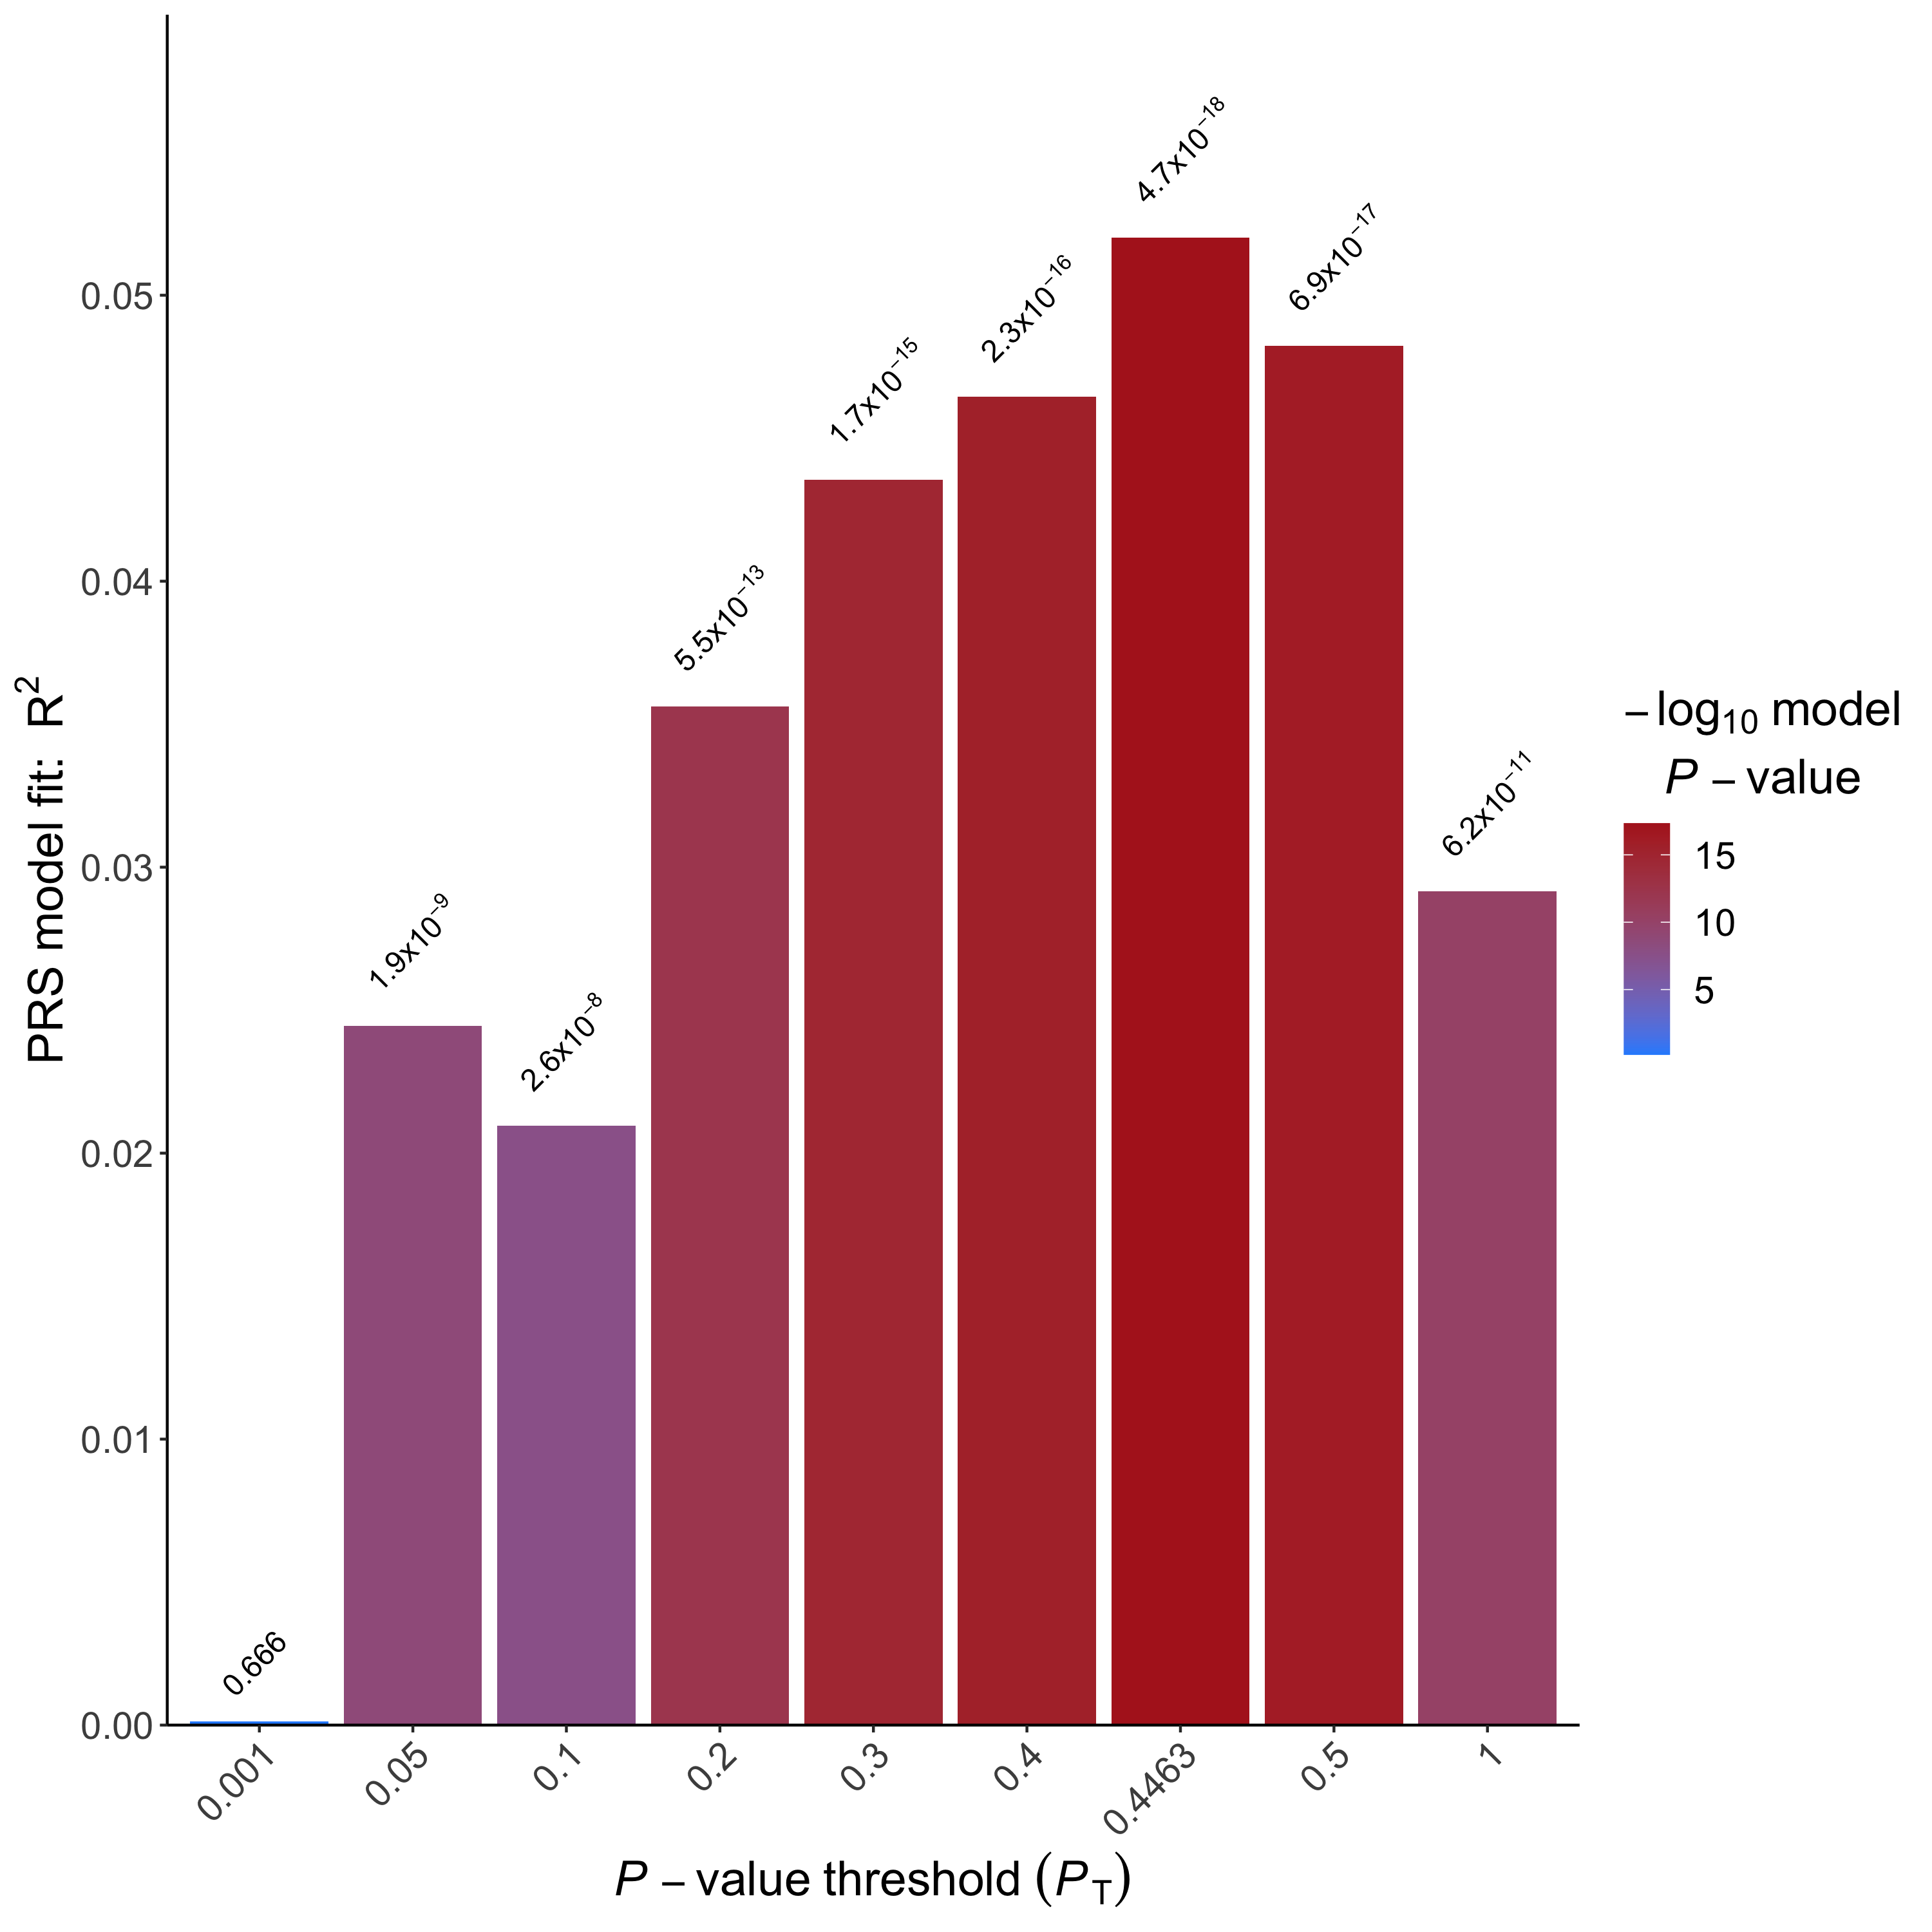

*Figure 6.2: Default PRSice barplot. Nagelkerke R2 and p-value as a function p-value threshold in discovery sample.*

The second plot is `PRSice_HIGH-RES_PLOT_<date> .pgn` (**Figure 6.3**) shows for many different p-value thresholds the p-value of the predictive effect in black together with an aggregated trend line in green. 

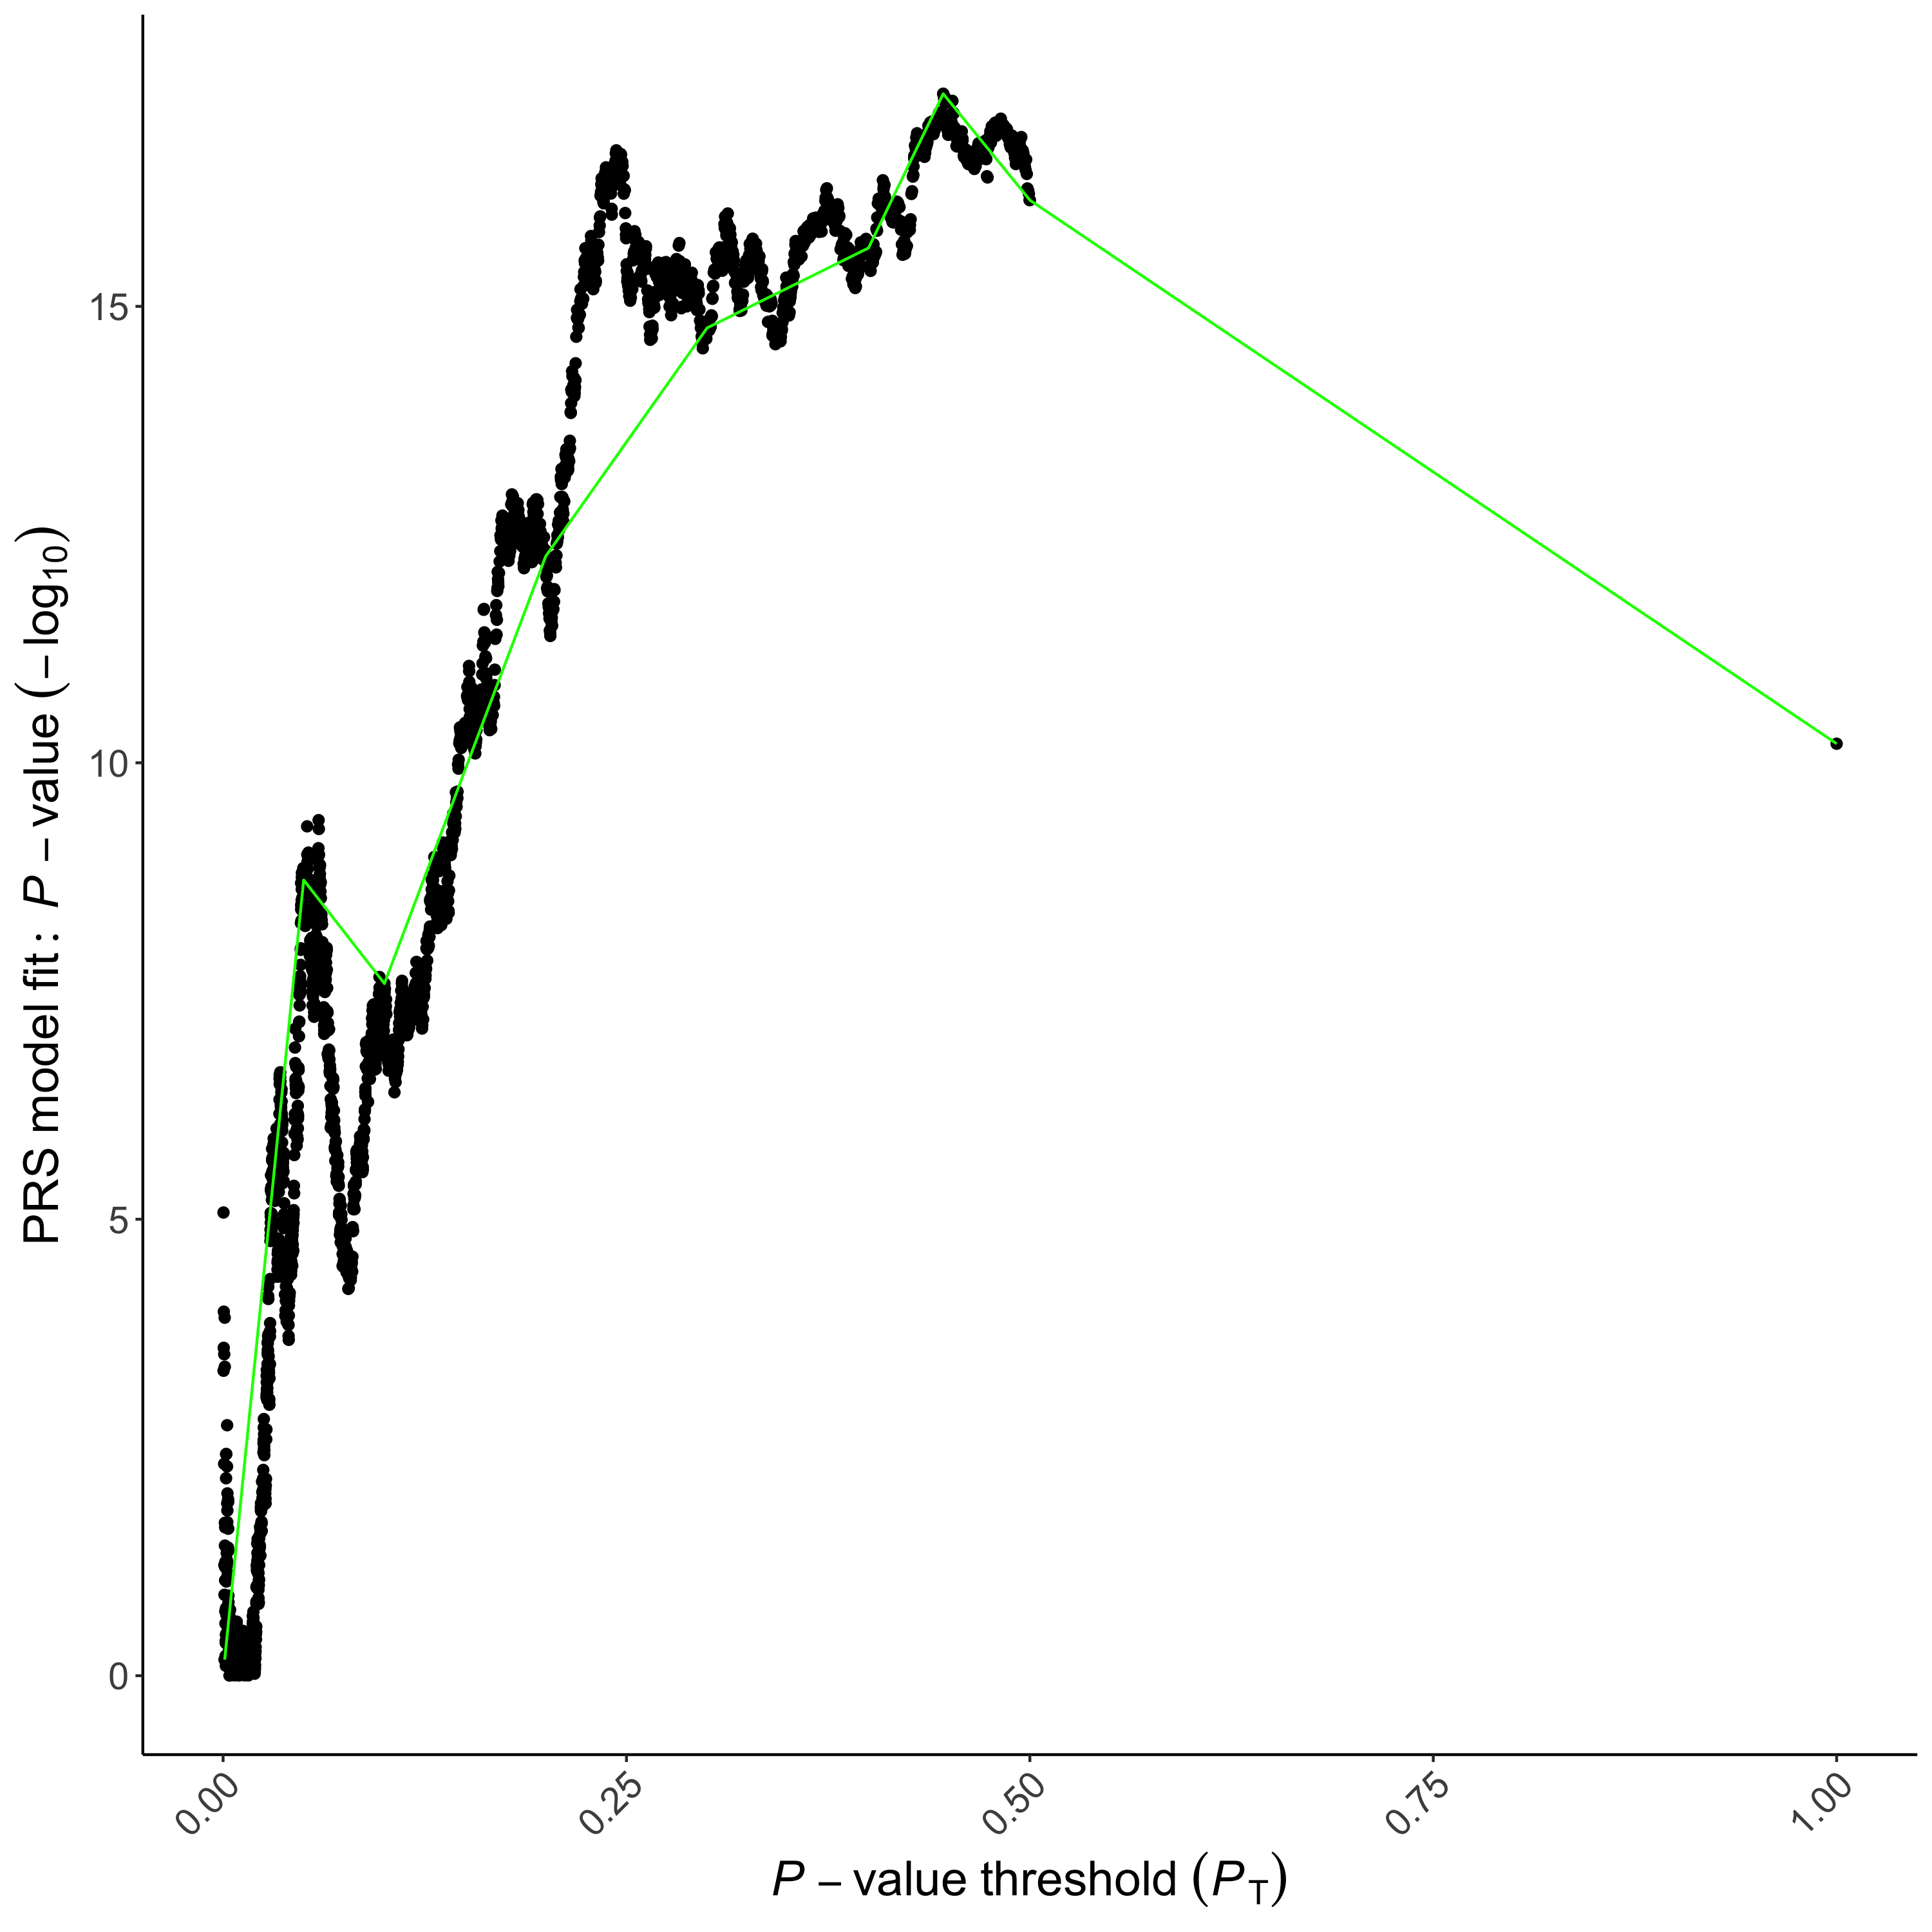

*Figure 6.3: Default PRSice high resolution plot. P-value as a function of predictive p-value (black) together with a trend line (green).*
 
Both figures show that many SNPs that affect the trait in the base sample can be used to predict the trait in the target sample. Note that the two traits can be either the same or different. If the same trait is used the predictive value is related to the heritability of the trait (as well as the sample size of the base sample). If different traits are analyzed, the predictive value is also related to the genetic overlap between the two traits. Either way, polygenic risk score analysis typically shows that models with lenient p-value thresholds often predict better than models with more stringent thresholds, suggesting that many statistically insignificant SNPs still have predictive value in polygenic traits.

### Conclusion
Here we discussed how to perform a simple polygenic risk score analysis using the PRSice script and how to interpret its results. When PLINK genotype target files are available, PRSice provides a relatively easy way of performing polygenic risk score analysis. As mentioned before, PRSice offers many additional options to adjust the risk score analysis, including adding covariates and additional principal components and adjusting clumping parameters. It is therefore recommended to read the user manual of PRSice to perform a polygenic risk score analysis optimal to the research question at hand.